In [1]:
intro_images_path='./Images/Intro_images/'
edge_images_path='../'#../Images/Edge_images/'
seg_images_path='../'#../Images/Seg_images/'
feature_images_path='./Images/Feature_images/'
output_path='./Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2024/25


<img src="./Logotipo_Solo.png" width=200/>

## Image  geometric transformations




http://szeliski.org/Book/

https://docs.opencv.org/4.3.0/da/d6e/tutorial_py_geometric_transformations.html

There are a number of basic geometric transformations we can perform on an image. OpenCV provides two transformation functions, **cv.warpAffine** and **cv.warpPerspective**, with which you can perform all kinds of transformations. cv.warpAffine takes a 2x3 transformation matrix, while cv.warpPerspective takes a 3x3 transformation matrix as inputs.



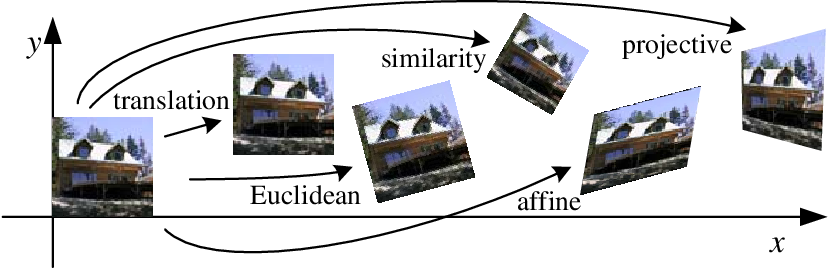


### Image translation

Translation is the shifting of pixels locations. Given the shift in the (x,y) direcion, (tx,ty), you can create the following transformation matrix M to be used with pixels homogeneous coordinates:

    M=[[1, 0, tx],
       [0, 1, ty]]
   





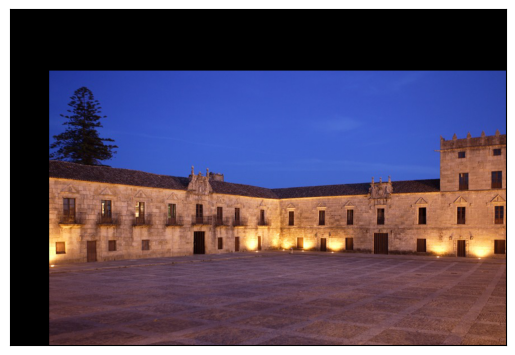

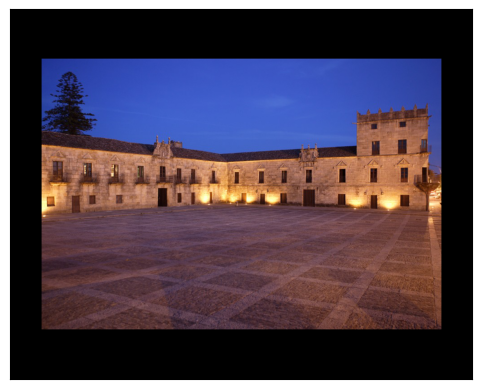

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys

# Load an color image in grayscale
img = cv2.imread(intro_images_path +'pazo.jpg')

if img is None:
    sys.exit('Failing at loading image')

img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
#translation with image cropping
img_tc = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)

plt.imshow(img_tc)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#translation without image cropping
img_t = cv2.warpAffine(img, translation_matrix, (num_cols+ 2*int(translation_matrix[0,2]), num_rows+ 2*int(translation_matrix[1,2])), cv2.INTER_LINEAR)

plt.imshow(img_t)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


### Image rotation

Rotation of an image by an angle θ is achieved by the transformation matrix of the form

    M=[[cosθ,  sinθ],
       [−sinθ, cosθ]]

OpenCV also provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer.The modified transformation matrix is given by

    M=[[α,  β, (1−α)⋅center.x−β⋅center.y], 
       [-β  α, β⋅center.x+(1−α)⋅center.y]]

where:

    α=scale⋅cosθ,
    β=scale⋅sinθ

To find this transformation matrix, write the affine transformation yourself and call OpenCv functions **cv2.warpAffine(image, M, output_shape)**. Alternatively, OpenCV provides a function, **cv.getRotationMatrix2D(center, angle, scale)**.


#### Alternative 1

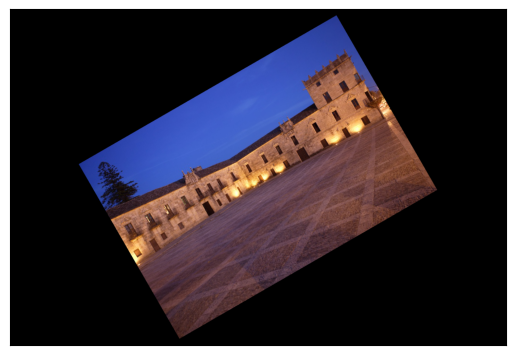

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 


def get_affine_M(c, a, s):
    sin_theta = np.sin(a)
    cos_theta = np.cos(a)
    
    m_11 = s * cos_theta
    m_21 = -s * sin_theta
    
    m_12 = s * sin_theta
    m_22 = s * cos_theta
        
    m_13 = c[0] * (1 - s * cos_theta) - s * sin_theta * c[1]
    m_23 = c[1] * (1 - s * cos_theta) + s * sin_theta * c[0]
                                                          
    return np.array([[m_11, m_12, m_13],[m_21, m_22, m_23]])

#Load an image 
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    
rows,cols = img.shape[:2]
center=((cols-1)/2, (rows-1)/2)
angle=30
scale=0.6

                    
M = get_affine_M(center, np.deg2rad(angle), scale)

img_r = cv2.warpAffine(img, M, (cols, rows))
                    
plt.imshow(img_r)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#### Alternative 2

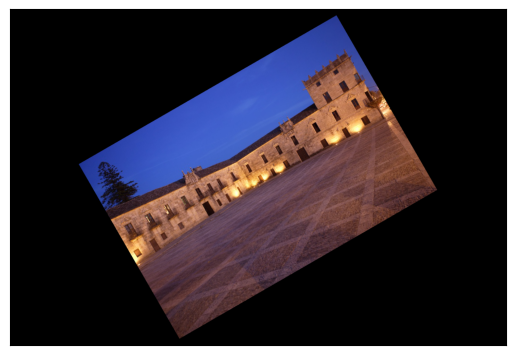

In [4]:
import numpy as np
import cv2 

img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows,cols = img.shape[:2]
center=((cols-1)/2, (rows-1)/2)
angle=30
scale=0.6

M=cv2.getRotationMatrix2D(center, angle, scale)

img_r = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(img_r)
plt.xticks([]), plt.yticks([]) 
plt.show()

### Image scaling

This is a commonly used transformation in computer vision where we try to resize the image according to the requirement. Image scaling allows either to enlarge or to shrink images. OpenCV provides function resize to scale images.


These are the interpolation methods provided by OpenCV to perform scaling operations:

- cv2.INTER_AREA uses pixel area relation for resampling. This is the best method for reducing the size of an image. When used for zooming into the image, it uses the INTER_NEAREST method.
    
- cv2.INTER_CUBIC uses bicubic interpolation for resizing. This method performs calculations based on the 4×4 neighboring pixels for the pixels. It takes the weighted average of these 16 pixels to create a new pixel.

- cv2.INTER_LINEAR is similar to the INTER_CUBIC interpolation. However, INTER_LINEAR only uses 2×2 neighboring pixels to get the weighted average for the pixels.

- cv2.INTER_NEAREST uses the nearest neighbor concept for interpolation. This uses only one neighboring pixel from the image for interpolation.

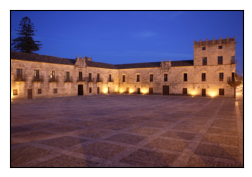

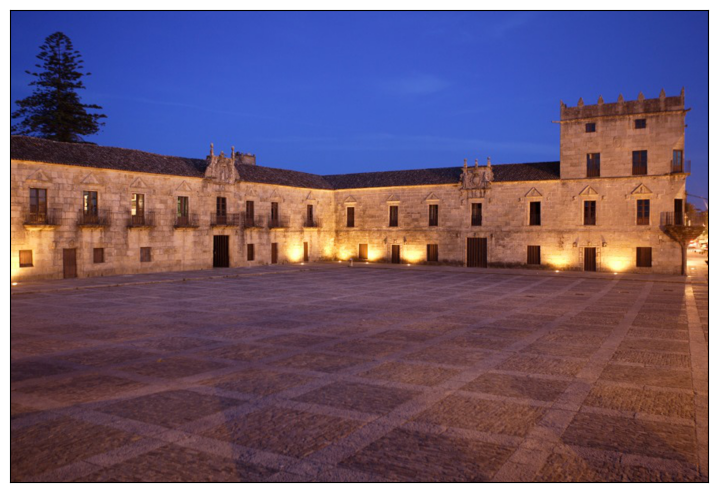

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#Load an color image in grayscale
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

img_shrinked = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
plt.figure(figsize= (0.01*img_shrinked.shape[0],0.01*img_shrinked.shape[1]));plt.imshow(img_shrinked)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


img_enlarged = cv2.resize(img,None,fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC)
plt.figure(figsize= (0.01*img_enlarged.shape[0],0.01*img_enlarged.shape[1]));plt.imshow(img_enlarged)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


### Affine Transformations

https://docs.opencv.org/4.x/d4/d61/tutorial_warp_affine.html
https://machinelearningknowledge.ai/affine-transformation-in-opencv-with-cv2-warpaffine/


In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then cv.getAffineTransform will create a 2x3 matrix which is to be passed to cv.warpAffine.

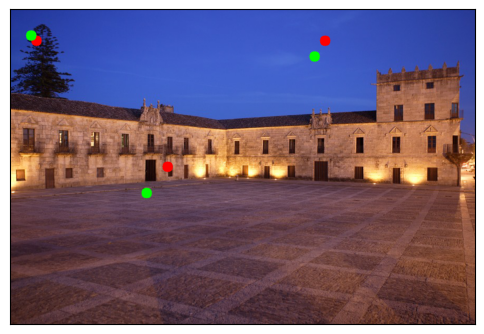

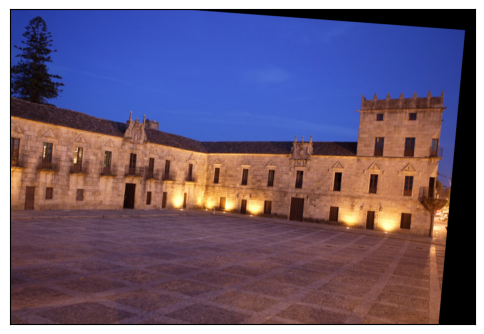

M= [[  0.98181818  -0.10606061  -2.72727273]
 [  0.07272727   1.17424242 -24.09090909]]


In [6]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#Load an color image in grayscale
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

image=img.copy()

pts1 = np.float32([[50,60],[600,60],[300,300]])
pts2 = np.float32([[40,50],[580,90],[260,350]])

for pt in pts1:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (255, 0, 0),-1)
for pt in pts2:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (0, 255, 0),-1)

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))


plt.figure(figsize= (0.01*image.shape[0],0.01*image.shape[1]));plt.imshow(image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.figure(figsize= (0.01*dst.shape[0],0.01*dst.shape[1]));plt.imshow(dst)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

print('M= {}'.format(M))


### Perspective transformation

The concept of homography has been introduced to explain visual perspective, the difference in appearance of two plane objects viewed from different points of view. 
For perspective transformation you need a 3x3 transformation matrix to be used with homogeneous coordiantes of pixels' locations. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the first view and corresponding points on the second view. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function **cv2.getPerspectiveTransform**. Then apply **c2v.warpPerspective** with this 3x3 transformation matrix.

The function cv2.warpPerspective() applies a perspective transformation to an image:
dst=cv2.warpPerspective(src, h, dsize)

- src: input image.
- dst: output image that has the size dsize and the same type as src .
- h: homography (3×3 transformation matrix).
- Dsize: size of the output image.

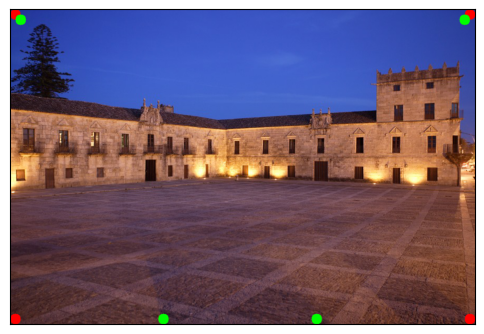

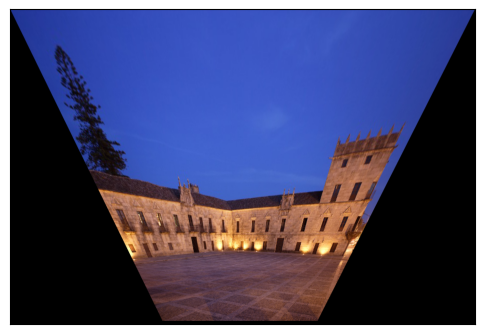

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#Load an color image in grayscale
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

rows, cols=img.shape[:2]
pts1 = np.float32([[10,10], [cols-10,10], [10,rows-10], [cols-10,rows-10]])
pts2 = np.float32([[20,20], [cols-20,20], [int(0.33*cols),rows-10], [int(0.66*cols),rows-10]])

P_M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, P_M, (cols,rows))

image=img.copy()

for pt in pts1:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (255, 0, 0),-1)
for pt in pts2:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (0, 255, 0),-1)


plt.figure(figsize= (0.01*image.shape[0],0.01*image.shape[1]));plt.imshow(image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.figure(figsize= (0.01*dst.shape[0],0.01*dst.shape[1]));plt.imshow(dst)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()



#### Exercise: Compute the homography between two views of the same scene

In [8]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'library1.jpg',  cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'library2.jpg', cv2.IMREAD_COLOR) 


## Chose 4 (not all aligned) corresponging points
#WRITE DOWN THEIR COODINATES!!
cv2.imshow('View 1', im1)
cv2.imshow('View 2', im2)

k = cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()


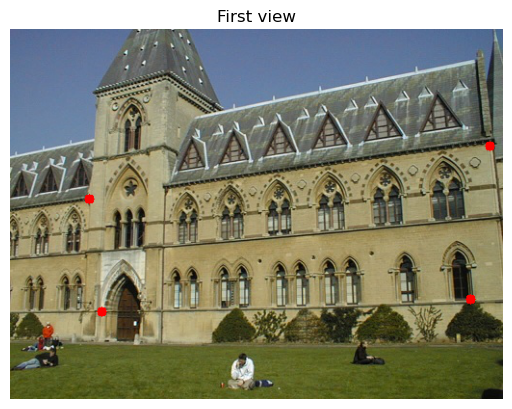

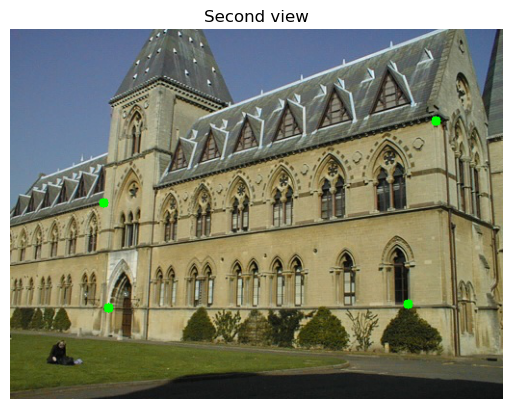

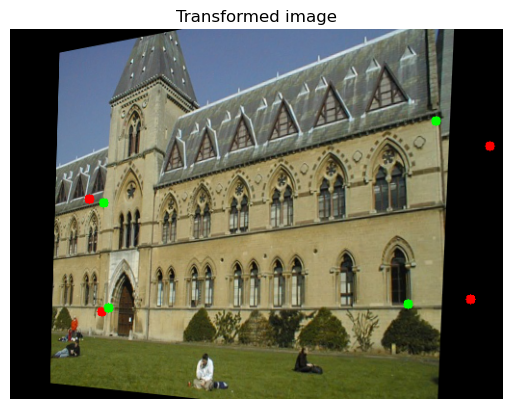

H= [[ 5.66066376e-01 -2.40355476e-02  5.12987124e+01]
 [-1.26668550e-01  9.05356791e-01  2.45230135e+01]
 [-5.15884731e-04  3.45153520e-05  1.00000000e+00]]


In [9]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'library1.jpg',  cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'library2.jpg', cv2.IMREAD_COLOR) 

im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) 


# Location of reference points
points1 = np.zeros((4, 2), dtype=np.float32) 
points2 = np.zeros((4, 2), dtype=np.float32) 

#INSERT HERE THE COORDINATES YOU HAVE WROTE DOWN 
#CHANGING THE CURRENT VALUES!!
points1[0, :] = [82,176]
points1[1, :] = [95,293]
points1[2, :] = [498,121]
points1[3, :] = [478,280]

points2[0, :] = [97,180]
points2[1, :] = [102,289]
points2[2, :] = [442,95]
points2[3, :] = [413,285]

im1c=im1.copy()
im2c=im2.copy()



for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(im1c), plt.title("First view")
plt.axis('off')
plt.show() 
plt.imshow(im2c), plt.title("Second view")
plt.axis('off')
plt.show()

# Find homography 

h, mask = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Use homography to align im1 with im2 
height1, width1, _ = im1.shape 
height2, width2, _ = im2.shape 

#Aligned image im1Reg, using a 3x3 transformation matrix 
imP = cv2.warpPerspective(im1, h, (1*width1 + 0*width2, 1*height1+ 0*height2)) 


for pt in points1:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(imP), plt.title("Transformed image")
plt.axis('off')
plt.show()

# Print estimated homography 

print('H= {}'.format(h)) 

#### Exercise: Combine two images

In [10]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'Logo_Paris.png', cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'eiffel.jpg', cv2.IMREAD_COLOR) 


## Chose 4 (not all aligned) corresponging points
cv2.imshow('View 1', im1)
cv2.imshow('View 2', im2)

k = cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()


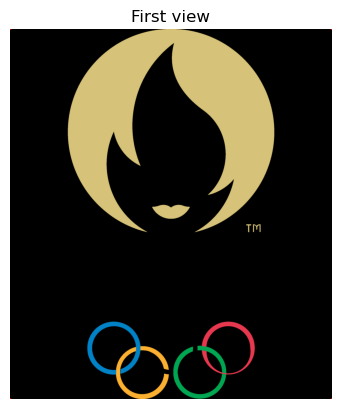

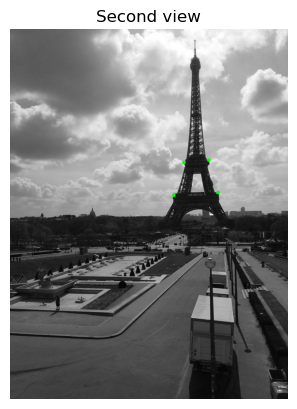

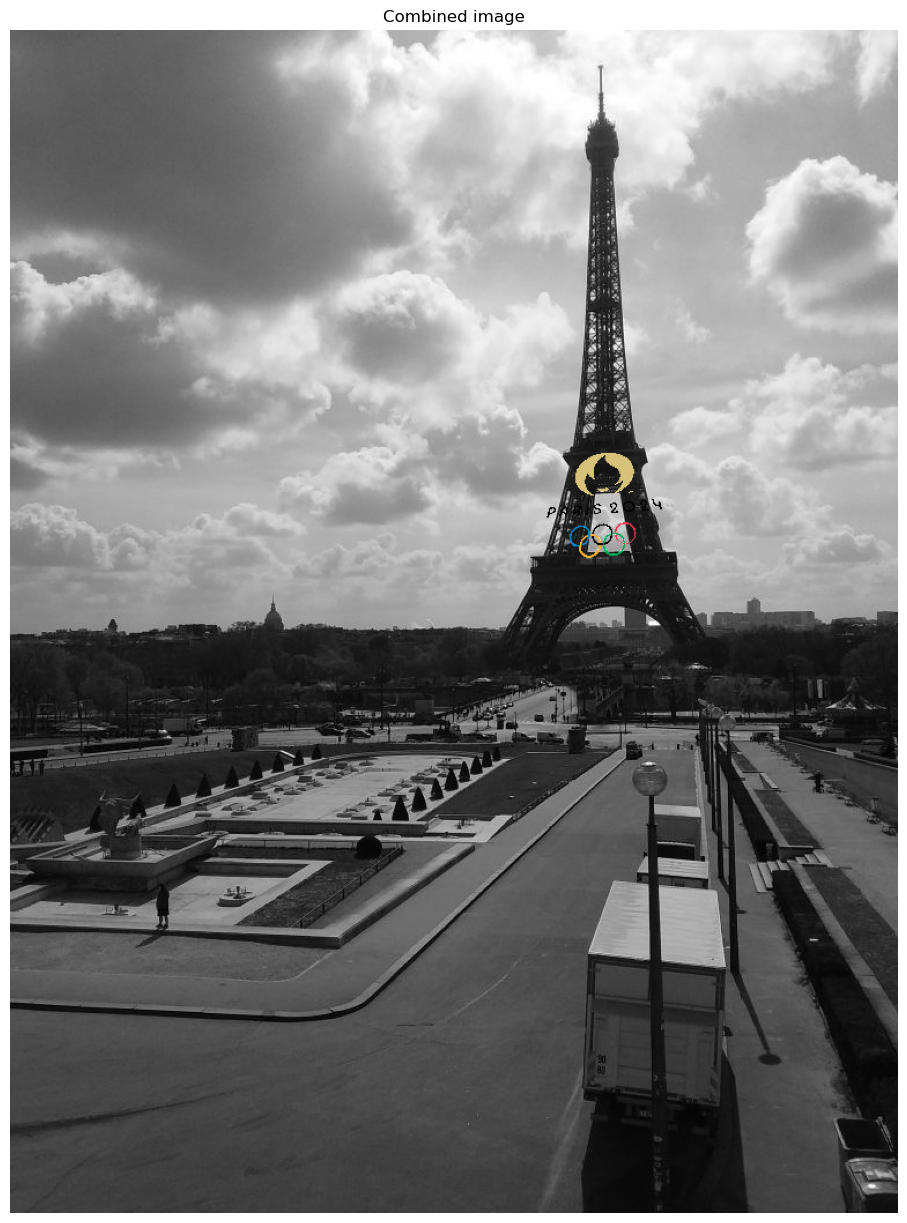

H= [[ 2.35259605e-02 -8.91205081e-02  4.79951054e+02]
 [-8.82768009e-03 -4.28015865e-02  3.68964780e+02]
 [-1.54202909e-05 -1.72220170e-04  1.00000000e+00]]


In [11]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'Logo_Paris.png', cv2.IMREAD_UNCHANGED) 

# Read second view 
im2 = cv2.imread(intro_images_path+'eiffel.jpg', cv2.IMREAD_COLOR) 

mask=im1[:,:,3]
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) 

# Location of reference points
points1 = np.zeros((4, 2), dtype=np.float32) 
points2 = np.zeros((4, 2), dtype=np.float32) 

points1[0, :] = [2,2]
points1[1, :] = [2158,2]
points1[2, :] = [2, 2484]
points1[3, :] = [2158,2484]

points2[0, :] = [480,369]
points2[1, :] = [549,362]
points2[2, :] = [452,459]
points2[3, :] = [574,452]

im1c=im1.copy()
im2c=im2.copy()

for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(im1c), plt.title("First view")
plt.axis('off')
plt.show() 
plt.imshow(im2c), plt.title("Second view")
plt.axis('off')
plt.show()

# Find homography 
h,_ = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Use homography to align im1 with im2 
height1, width1, _ = im1c.shape 
height2, width2, _ = im2c.shape 

#Aligned image im1, using a 3x3 transformation matrix 
imP = cv2.warpPerspective(im1, h, (width2,height2))
maskP= cv2.warpPerspective(mask, h, (width2,height2))

maskP_inv = cv2.bitwise_not(maskP)

im_bg = cv2.bitwise_and(im2,im2,mask = maskP_inv)

im_fg = cv2.bitwise_and(imP,imP,mask = maskP)

res=cv2.add(im_bg,im_fg)# mask=im_mP)

plt.figure(figsize= (0.02*res.shape[0],0.02*res.shape[1]));
plt.imshow(res), plt.title("Combined image")
plt.axis('off')
plt.show()

# Print estimated homography 

print('H= {}'.format(h)) 

### EXERCISE 1

Transform the image torre_hercules_1.jpg to get a view of the same scene as if it were captured from the same point of view as torre_hercules_2.jpg

In [30]:
# Use the full-size images, they don't fit entirely on the screen

import cv2

# Change the names if your images are in a different path
img1 = cv2.imread(intro_images_path + 'torre_hercules_1.jpg')
img2 = cv2.imread(intro_images_path + 'torre_hercules_2.jpg')

if img1 is None or img2 is None:
    raise IOError("Could not load images. Check the name or path.")

# Lists to save coordinates
points_img1 = []
points_img2 = []

# Function to handle clicks
def get_points(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points = param
        points.append((x, y))
        print(f"Selected point: ({x}, {y})")

# === Select points in the first image ===
cv2.imshow('Select 4 points in torre_hercules_1', img1)
cv2.setMouseCallback('Select 4 points in torre_hercules_1', get_points, points_img1)

print("Select 4 points in the FIRST image (torre_hercules_1).")
cv2.waitKey(0)
cv2.destroyAllWindows()

# === Select points in the second image ===
cv2.imshow('Select the same 4 points in torre_hercules_2', img2)
cv2.setMouseCallback('Select the same 4 points in torre_hercules_2', get_points, points_img2)

print("Select the same 4 points in the SECOND image (torre_hercules_2).")
cv2.waitKey(0)
cv2.destroyAllWindows()

Select 4 points in the FIRST image (torre_hercules_1).
Selected point: (365, 543)
Selected point: (678, 515)
Selected point: (449, 846)
Selected point: (583, 835)
Select the same 4 points in the SECOND image (torre_hercules_2).
Selected point: (197, 281)
Selected point: (413, 61)
Selected point: (227, 401)
Selected point: (344, 299)


In [31]:
# Display reduced images but calculate original coordinates

import cv2
import numpy as np

# ==============================
# Load images
# ==============================
img1 = cv2.imread(intro_images_path + 'torre_hercules_1.jpg')
img2 = cv2.imread(intro_images_path + 'torre_hercules_2.jpg')

if img1 is None or img2 is None:
    raise IOError("Could not load images. Check the name or path.")

# ==============================
# Reduce size for visualization
# ==============================
scale = 0.5  # change to 0.4 or 0.6 if you want
img1_small = cv2.resize(img1, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
img2_small = cv2.resize(img2, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# ==============================
# Lists to save coordinates
# ==============================
points_img1 = []
points_img2 = []

# ==============================
# Callback function
# ==============================
# def get_points(event, x, y, flags, param):
#     if event == cv2.EVENT_LBUTTONDOWN:
#         points = param
#         points.append((x, y))
#         print(f"Selected point: ({x}, {y})")

display_scale = 0.5
# img1_small = cv2.resize(img1, (0, 0), fx=display_scale, fy=display_scale)

def get_points(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Convert click coordinates directly to original scale
        orig_x = int(x / display_scale)
        orig_y = int(y / display_scale)
        param.append((orig_x, orig_y))
        print(f"Original point: ({orig_x}, {orig_y})")



# ==============================
# Point selection in image 1
# ==============================
cv2.imshow('Select 4 points in torre_hercules_1 (ESC to close)', img1_small)
cv2.setMouseCallback('Select 4 points in torre_hercules_1 (ESC to close)', get_points, points_img1)

print("Select 4 points in the FIRST image (reduced torre_hercules_1).")
cv2.waitKey(0)
cv2.destroyAllWindows()

# ==============================
# Point selection in image 2
# ==============================
cv2.imshow('Select the same 4 points in torre_hercules_2 (ESC to close)', img2_small)
cv2.setMouseCallback('Select the same 4 points in torre_hercules_2 (ESC to close)', get_points, points_img2)

print("Select the same 4 points in the SECOND image (reduced torre_hercules_2).")
cv2.waitKey(0)
cv2.destroyAllWindows()

Select 4 points in the FIRST image (reduced torre_hercules_1).
Original point: (364, 542)
Original point: (666, 512)
Original point: (426, 1318)
Original point: (562, 1306)
Select the same 4 points in the SECOND image (reduced torre_hercules_2).
Original point: (196, 274)
Original point: (412, 52)
Original point: (68, 1002)
Original point: (268, 952)


In [33]:
import re

def convert_coordinates_to_format(text, variable_name="points"):
    """
    Converts text with coordinates like '(368, 544)' 
    into lines like 'points[0, :] = [368, 544]'
    """

    # Find all number pairs between parentheses
    coords = re.findall(r'\((\d+),\s*(\d+)\)', text)
    
    if not coords:
        print("No coordinates found in the text.")
        return

    # Generate lines with the desired format
    result = []
    for i, (x, y) in enumerate(coords):
        result.append(f"{variable_name}[{i}, :] = [{x}, {y}]")

    # Print the result in clean format
    print("\n".join(result))


# ==============================
# Usage (copy and paste previous output)
# ==============================
text = """
Select 4 points in the FIRST image (reduced torre_hercules_1).
Original point: (364, 542)
Original point: (666, 512)
Original point: (426, 1318)
Original point: (562, 1306)
Select the same 4 points in the SECOND image (reduced torre_hercules_2).
Original point: (196, 274)
Original point: (412, 52)
Original point: (68, 1002)
Original point: (268, 952)
"""


convert_coordinates_to_format(text.split("SECOND")[0], "points1")


convert_coordinates_to_format(text.split("SECOND")[1], "points2")


points1[0, :] = [364, 542]
points1[1, :] = [666, 512]
points1[2, :] = [426, 1318]
points1[3, :] = [562, 1306]
points2[0, :] = [196, 274]
points2[1, :] = [412, 52]
points2[2, :] = [68, 1002]
points2[3, :] = [268, 952]


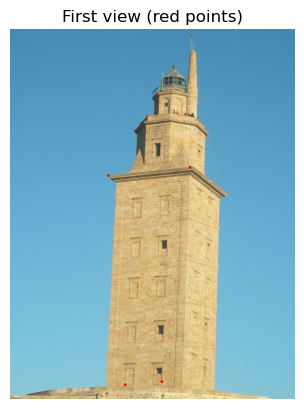

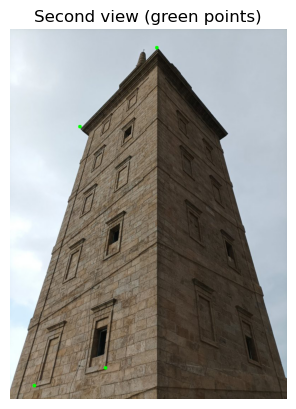

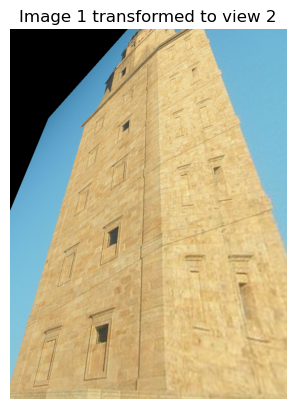

Homography matrix H =
[[ 2.64202775e-01 -1.53514695e-01  1.07499874e+02]
 [-4.56528885e-01  1.55899897e-01  2.50083531e+02]
 [-4.30596372e-04 -4.21857944e-04  1.00000000e+00]]


In [35]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Load the two views of the Tower of Hercules
im1 = cv2.imread(intro_images_path + 'torre_hercules_1.jpg', cv2.IMREAD_COLOR) 
im2 = cv2.imread(intro_images_path + 'torre_hercules_2.jpg', cv2.IMREAD_COLOR) 

# Convert BGR → RGB (to display correctly with matplotlib)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) 

# Create arrays for the points
points1 = np.zeros((4, 2), dtype=np.float32) 
points2 = np.zeros((4, 2), dtype=np.float32) 

# YOUR COORDINATES WILL GO HERE (corresponding points)
# points1 = coordinates in torre_hercules_1.jpg
# points2 = coordinates in torre_hercules_2.jpg
# Example: (these values are made up, you'll replace them later)

points1[0, :] = [364, 542]
points1[1, :] = [666, 512]
points1[2, :] = [426, 1318]
points1[3, :] = [562, 1306]
points2[0, :] = [196, 274]
points2[1, :] = [412, 52]
points2[2, :] = [68, 1002]
points2[3, :] = [268, 952]

# Draw the points on each image to check
im1c = im1.copy()
im2c = im2.copy()

for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])), 5, (255, 0, 0), -1)
for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])), 5, (0, 255, 0), -1)
    
plt.imshow(im1c), plt.title("First view (red points)")
plt.axis('off')
plt.show() 

plt.imshow(im2c), plt.title("Second view (green points)")
plt.axis('off')
plt.show()

# Calculate the homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Apply the homography (align the first image with the second)
height1, width1, _ = im1.shape 
height2, width2, _ = im2.shape 

imP = cv2.warpPerspective(im1, h, (width2, height2)) 

plt.imshow(imP), plt.title("Image 1 transformed to view 2")
plt.axis('off')
plt.show()

print('Homography matrix H =')
print(h)

### EXERCISE 2

Mapping coordinates from 3D to 2D is a common task in computer vision. This process involves transforming 3D points in a 3D space to their corresponding positions (pixels) on a 2D image plane. To performe this mapping we need to know:  
- The intrinsic parameters of the camera (focal length, size of the pixel in mm, the center of the image plane in pixels, distortion parameters), and 
- The extrinsic parameters (Rotation and Trnslation between the 3D world coordinates system and camera attahched 3D coordinates system).

OpenCV function **cv2.projectPoints(points_3d, rvec, tvec, camera_matrix, dist_coeffs)** allows to perform the necesay computations,

where,


    points_3d – is a 3D point in the world coordinate system.
    rvec – Rotation Vectors
    tvec – Translation Vectors
    camera_matrix – The physical parameters of the camera.
    dist_coeffs – It is a vector of distortion coefficients.
    
Considere the corners of a 3d Cube, represent them and the edges in 3D, and then computed the projections of the corners in the image plane of the camera. Show the examples for different sets of intrinsics and extrinsics.


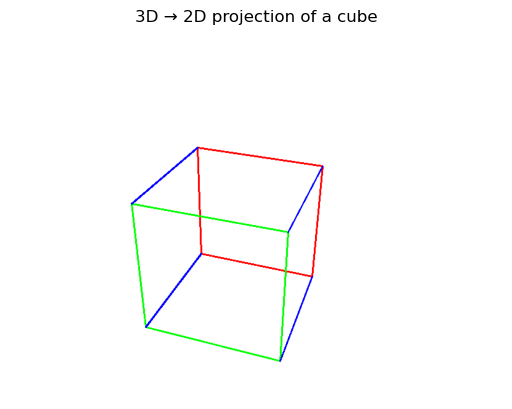

Intrinsic matrix:
 [[800.   0. 400.]
 [  0. 800. 300.]
 [  0.   0.   1.]]
Rotation vector:
 [[0.5]
 [0.3]
 [0.1]]
Translation vector:
 [[0.]
 [0.]
 [8.]]


In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# ====== Define the 3D points of the cube ======

# Create the 8 vertices of the cube (in world coordinates)
# Cube centered at the origin with side length of 2 units
cube_3d = np.float32([
    [-1, -1,  0],
    [ 1, -1,  0],
    [ 1,  1,  0],
    [-1,  1,  0],
    [-1, -1, -2],
    [ 1, -1, -2],
    [ 1,  1, -2],
    [-1,  1, -2]
])

# ====== Intrinsic parameters ======

# Assume a camera of 800x600 pixels
focal_length = 800  # in pixels
center = (400, 300)  # image center (cx, cy)

camera_matrix = np.array([
    [focal_length, 0, center[0]],
    [0, focal_length, center[1]],
    [0, 0, 1]
], dtype=np.float64)

# Distortion (assume ideal camera without distortion)
dist_coeffs = np.zeros((4, 1))

# ====== Extrinsic parameters ======
rvec = np.array([[0.5], [0.3], [0.1]], dtype=np.float64)  # rotation
tvec = np.array([[0], [0], [8]], dtype=np.float64) # translation

# ====== Project 3D points to 2D ======
projected_points, _ = cv2.projectPoints(cube_3d, rvec, tvec, camera_matrix, dist_coeffs)


# Convert to integers for drawing
projected_points = np.int32(projected_points).reshape(-1, 2)

# ====== Draw ======

# Create canvas (empty image)
img = np.ones((600, 800, 3), dtype=np.uint8) * 255

# Draw the cube edges
def draw_cube(img, pts):
    # bottom base
    img = cv2.drawContours(img, [pts[:4]], -1, (0, 0, 255), 2)
    # top base
    img = cv2.drawContours(img, [pts[4:]], -1, (0, 255, 0), 2)
    # columns
    for i in range(4):
        img = cv2.line(img, tuple(pts[i]), tuple(pts[i+4]), (255, 0, 0), 2)
    return img

img = draw_cube(img, projected_points)

# Display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("3D → 2D projection of a cube")
plt.axis('off')
plt.show()

print("Intrinsic matrix:\n", camera_matrix)
print("Rotation vector:\n", rvec)
print("Translation vector:\n", tvec)

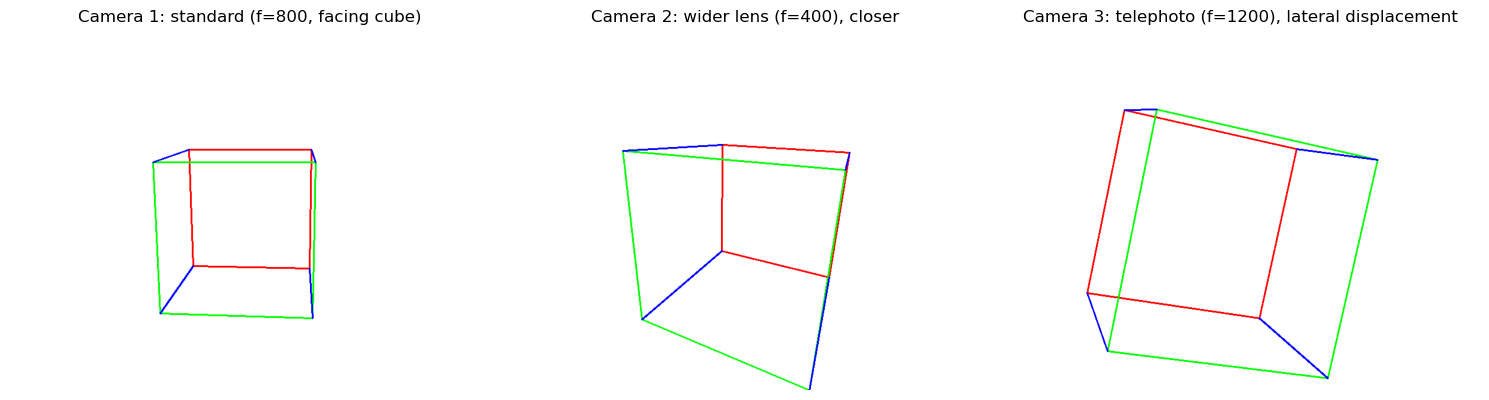

In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# ====== Define the 3D points of the cube ======
cube_3d = np.float32([
    [-1, -1,  0],
    [ 1, -1,  0],
    [ 1,  1,  0],
    [-1,  1,  0],
    [-1, -1, -2],
    [ 1, -1, -2],
    [ 1,  1, -2],
    [-1,  1, -2]
])

# ====== Function to draw the cube ======
def draw_cube(img, pts):
    pts = np.int32(pts).reshape(-1, 2)
    # bottom base
    img = cv2.drawContours(img, [pts[:4]], -1, (0, 0, 255), 2)
    # top base
    img = cv2.drawContours(img, [pts[4:]], -1, (0, 255, 0), 2)
    # columns
    for i in range(4):
        img = cv2.line(img, tuple(pts[i]), tuple(pts[i+4]), (255, 0, 0), 2)
    return img

# ====== Different camera configurations ======
configurations = [
    {
        "name": "Camera 1: standard (f=800, facing cube)",
        "focal_length": 800,
        "center": (400, 300),
        "rvec": np.array([[0.2], [0.1], [0.0]], dtype=np.float64),
        "tvec": np.array([[0], [0], [8]], dtype=np.float64)
    },
    {
        "name": "Camera 2: wider lens (f=400), closer",
        "focal_length": 400,
        "center": (400, 300),
        "rvec": np.array([[0.3], [0.4], [0.1]], dtype=np.float64),
        "tvec": np.array([[0.5], [0], [4]], dtype=np.float64)
    },
    {
        "name": "Camera 3: telephoto (f=1200), lateral displacement",
        "focal_length": 1200,
        "center": (400, 300),
        "rvec": np.array([[0.1], [-0.3], [0.2]], dtype=np.float64),
        "tvec": np.array([[-0.5], [0.1], [8]], dtype=np.float64)
    }
]

# ====== Create projections ======
plt.figure(figsize=(15, 5))

for i, cfg in enumerate(configurations):
    # Intrinsic matrix
    camera_matrix = np.array([
        [cfg["focal_length"], 0, cfg["center"][0]],
        [0, cfg["focal_length"], cfg["center"][1]],
        [0, 0, 1]
    ], dtype=np.float64)

    dist_coeffs = np.zeros((4, 1))  # no distortion

    # Projection
    projected_points, _ = cv2.projectPoints(
        cube_3d, cfg["rvec"], cfg["tvec"], camera_matrix, dist_coeffs
    )

    # White image
    img = np.ones((600, 800, 3), dtype=np.uint8) * 255
    img = draw_cube(img, projected_points)

    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(cfg["name"])
    plt.axis('off')

plt.tight_layout()
plt.show()